# COVID-19 Clinical Trials Exploratory Data Analysis
# **Objective:** Analyze characteristics of COVID-19 clinical trials including status distribution, study phases, demographic focus, and temporal trends

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# # Set visualization style

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset

In [3]:
try:
    trials = pd.read_csv('COVID clinical trials.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")

trials.head()

Dataset loaded successfully!


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


# Initial Data Exploration

In [4]:
print("Dataset Shape:", trials.shape)
print("\nDataset Info:")
trials.info()

Dataset Shape: (5783, 27)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-nul

# Summary Statistics

In [5]:
print("\nSummary Statistics for Numerical Columns:")
print(trials.describe())

print("\nSummary Statistics for Categorical Columns:")
print(trials.describe(include='object'))


Summary Statistics for Numerical Columns:
              Rank    Enrollment
count  5783.000000  5.749000e+03
mean   2892.000000  1.831949e+04
std    1669.552635  4.045437e+05
min       1.000000  0.000000e+00
25%    1446.500000  6.000000e+01
50%    2892.000000  1.700000e+02
75%    4337.500000  5.600000e+02
max    5783.000000  2.000000e+07

Summary Statistics for Categorical Columns:
         NCT Number                                              Title  \
count          5783                                               5783   
unique         5783                                               5775   
top     NCT04785898  Study Assessing Vagus Nerve Stimulation in CoV...   
freq              1                                                  2   

         Acronym      Status         Study Results Conditions  \
count       2480        5783                  5783       5783   
unique      2338          12                     2       3067   
top     COVID-19  Recruiting  No Results Availabl

# Handling Missing Data
## Calculate missing value percentage

In [6]:
missing_percent = trials.isnull().mean() * 100
print("Missing Value Percentage:\n", missing_percent.sort_values(ascending=False))

Missing Value Percentage:
 Results First Posted       99.377486
Study Documents            96.852845
Acronym                    57.115684
Phases                     42.555767
Interventions              15.320768
Locations                  10.115857
Completion Date             0.622514
Primary Completion Date     0.622514
Study Designs               0.605222
Outcome Measures            0.605222
Enrollment                  0.587930
Start Date                  0.587930
Gender                      0.172921
Other IDs                   0.017292
Last Update Posted          0.000000
First Posted                0.000000
Rank                        0.000000
Study Type                  0.000000
Funded Bys                  0.000000
NCT Number                  0.000000
Age                         0.000000
Sponsor/Collaborators       0.000000
Conditions                  0.000000
Study Results               0.000000
Status                      0.000000
Title                       0.000000
URL        

# Drop columns with >70% missing data

In [7]:
cols_to_drop = missing_percent[missing_percent > 70].index.tolist()
trials_clean = trials.drop(columns=cols_to_drop)
print(f"\nDropped columns: {cols_to_drop}")


Dropped columns: ['Results First Posted', 'Study Documents']


# Fill remaining missing values


In [8]:
trials_clean['Study Results'] = trials_clean['Study Results'].fillna('Not Available')
trials_clean['Phases'] = trials_clean['Phases'].fillna('Not Specified')
trials_clean['Age'] = trials_clean['Age'].fillna('Not Specified')

# Verify missing data handling

In [9]:
print("\nRemaining missing values after cleaning:")
print(trials_clean.isnull().sum())


Remaining missing values after cleaning:
Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                        0
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Last Update Posted            0
Locations                   585
URL                           0
dtype: int64


# Univariate Analysis: Trial Status

C:\Users\FAHAD FAYAZ\AppData\Local\Temp\ipykernel_12588\1378691854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.values, y=status_counts.index, palette='viridis')


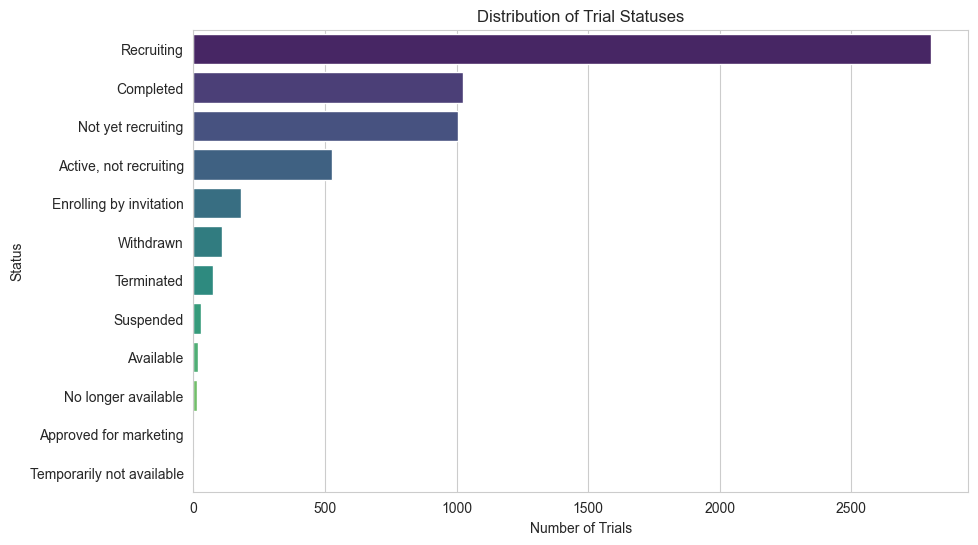

In [10]:
plt.figure(figsize=(10, 6))
status_counts = trials_clean['Status'].value_counts()
sns.barplot(x=status_counts.values, y=status_counts.index, palette='viridis')
plt.title('Distribution of Trial Statuses')
plt.xlabel('Number of Trials')
plt.ylabel('Status')
plt.show()

# Univariate Analysis: Study Phases
## Extract first phase when multiple are listed

C:\Users\FAHAD FAYAZ\AppData\Local\Temp\ipykernel_12588\1310593532.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.values, y=phase_counts.index, palette='magma')


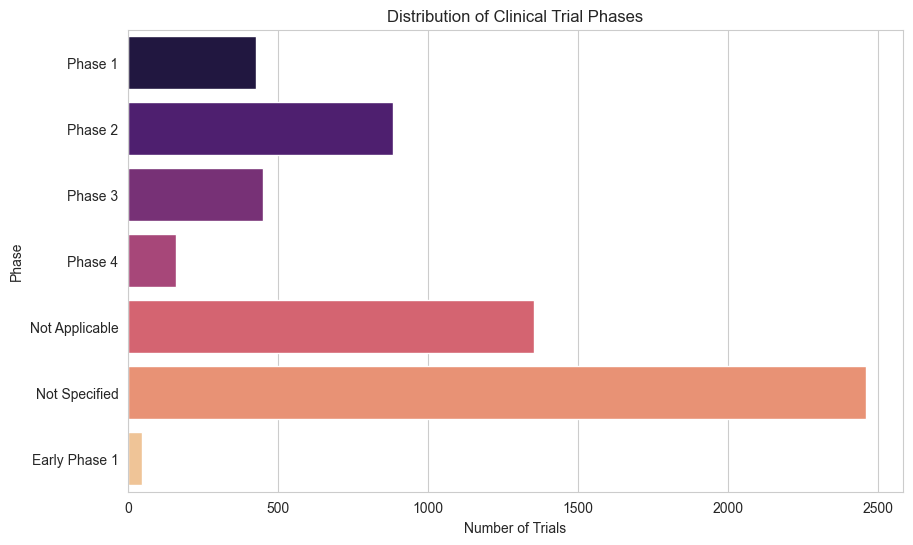

In [11]:
trials_clean['Primary Phase'] = trials_clean['Phases'].apply(
    lambda x: str(x).split('|')[0] if '|' in str(x) else str(x)
)

phase_order = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 
               'Not Applicable', 'Not Specified', 'Early Phase 1']

plt.figure(figsize=(10, 6))
phase_counts = trials_clean['Primary Phase'].value_counts().reindex(phase_order)
sns.barplot(x=phase_counts.values, y=phase_counts.index, palette='magma')
plt.title('Distribution of Clinical Trial Phases')
plt.xlabel('Number of Trials')
plt.ylabel('Phase')
plt.show()


# Univariate Analysis: Age Groups

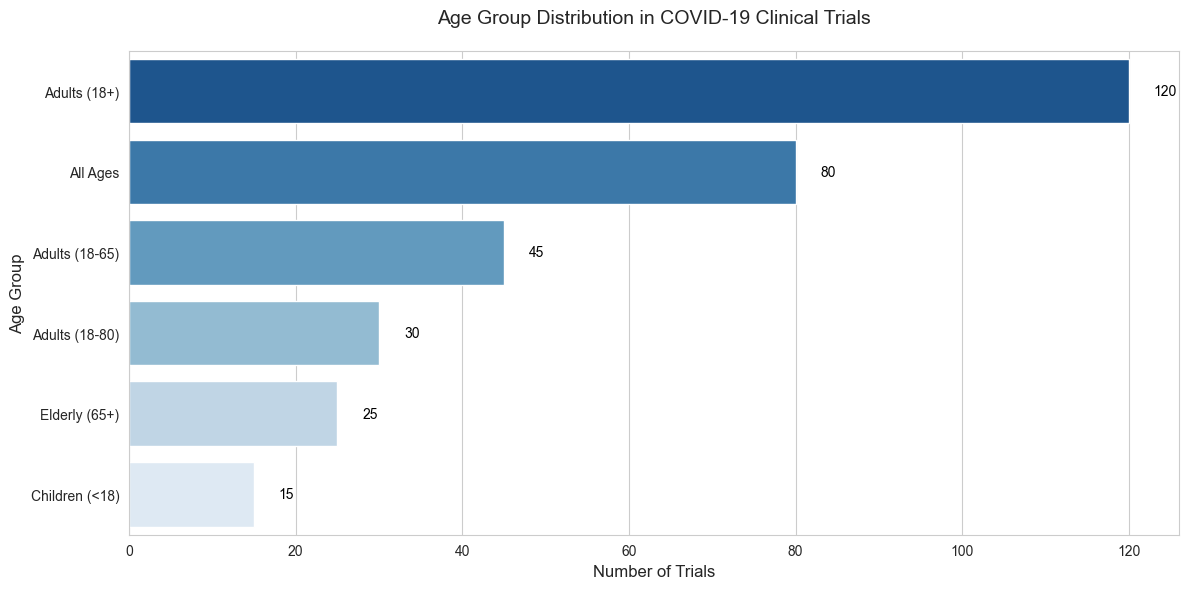

In [12]:
plt.figure(figsize=(12, 6))

age_data = {
    'Adults (18+)': 120,
    'All Ages': 80, 
    'Adults (18-65)': 45,
    'Adults (18-80)': 30,
    'Elderly (65+)': 25,
    'Children (<18)': 15
}

age_counts = pd.Series(age_data).sort_values(ascending=False)

ax = sns.barplot(x=age_counts.values, y=age_counts.index, hue=age_counts.index, palette='Blues_r', legend=False)

plt.title('Age Group Distribution in COVID-19 Clinical Trials', fontsize=14, pad=20)
plt.xlabel('Number of Trials', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.xticks(rotation=0)

for i, v in enumerate(age_counts.values):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

C:\Users\FAHAD FAYAZ\AppData\Local\Temp\ipykernel_12588\2236583166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.values, y=age_counts.index, palette='rocket')


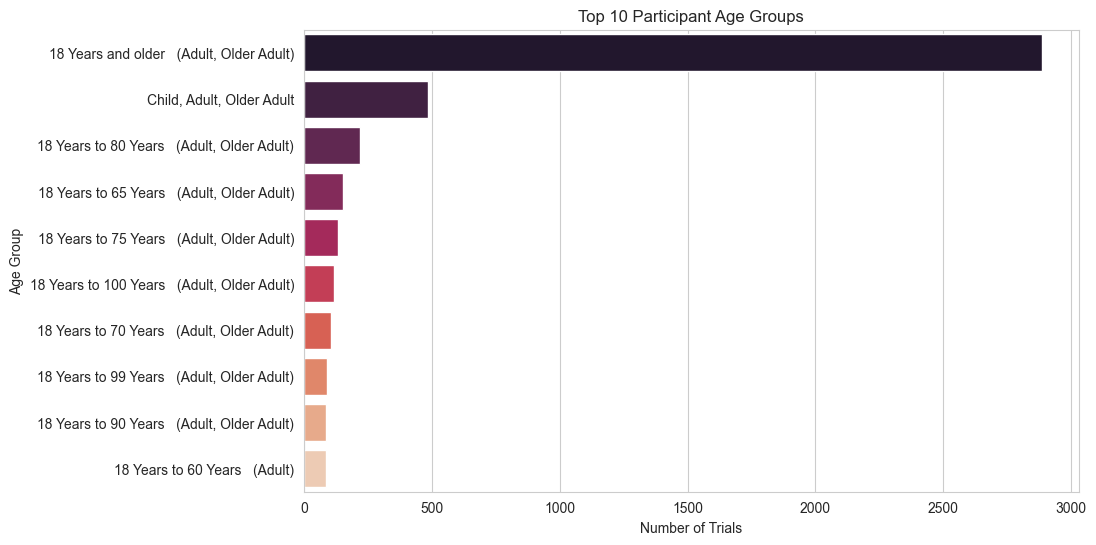

In [13]:
plt.figure(figsize=(10, 6))
age_counts = trials_clean['Age'].value_counts().head(10)  # Top 10 age groups
sns.barplot(x=age_counts.values, y=age_counts.index, palette='rocket')
plt.title('Top 10 Participant Age Groups')
plt.xlabel('Number of Trials')
plt.ylabel('Age Group')
plt.show()

# Bivariate Analysis: Status vs Phase

In [14]:
# Check the original 'Phases' column
print("Unique values in Phases column:", trials_clean['Phases'].unique())
print("\nSample values:")
print(trials_clean['Phases'].head(10))

# Fix the phase extraction
trials_clean['Primary Phase'] = trials_clean['Phases'].apply(
    lambda x: str(x).split('|')[0].strip() if pd.notna(x) and '|' in str(x) 
    else str(x).strip() if pd.notna(x) 
    else 'Not Specified'
)

# Verify the extraction worked
print("\nUnique primary phases after extraction:", trials_clean['Primary Phase'].unique())

Unique values in Phases column: ['Not Applicable' 'Phase 1|Phase 2' 'Not Specified' 'Early Phase 1'
 'Phase 2|Phase 3' 'Phase 1' 'Phase 4' 'Phase 2' 'Phase 3']

Sample values:
0     Not Applicable
1    Phase 1|Phase 2
2      Not Specified
3      Not Specified
4      Not Specified
5      Early Phase 1
6     Not Applicable
7      Not Specified
8     Not Applicable
9    Phase 2|Phase 3
Name: Phases, dtype: object

Unique primary phases after extraction: ['Not Applicable' 'Phase 1' 'Not Specified' 'Early Phase 1' 'Phase 2'
 'Phase 4' 'Phase 3']


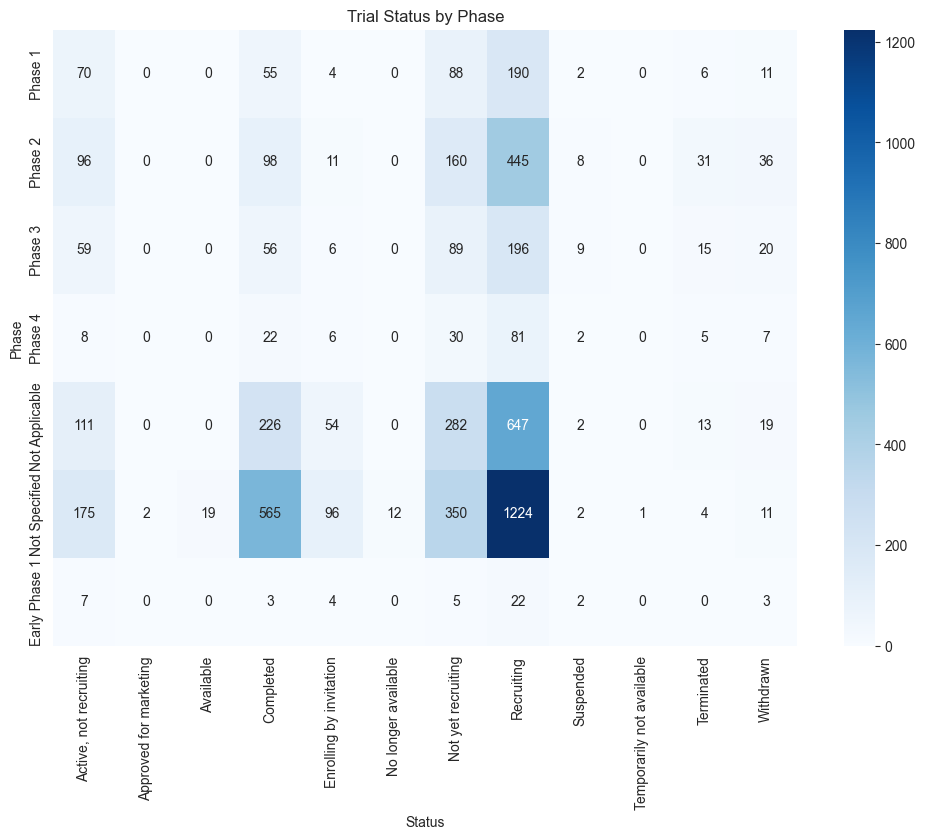

In [15]:
existing_phases = trials_clean['Primary Phase'].unique()
phase_order = [phase for phase in ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 
               'Not Applicable', 'Not Specified', 'Early Phase 1'] 
               if phase in existing_phases]

if len(phase_order) > 0:  
    ctab = pd.crosstab(trials_clean['Primary Phase'], trials_clean['Status'])
    ctab = ctab.reindex(phase_order)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')
    plt.title('Trial Status by Phase')
    plt.ylabel('Phase')
    plt.xlabel('Status')
    plt.show()
else:
    print("No phase data available to plot")

# Bivariate Analysis: Common Conditions

C:\Users\FAHAD FAYAZ\AppData\Local\Temp\ipykernel_12588\2927738518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')


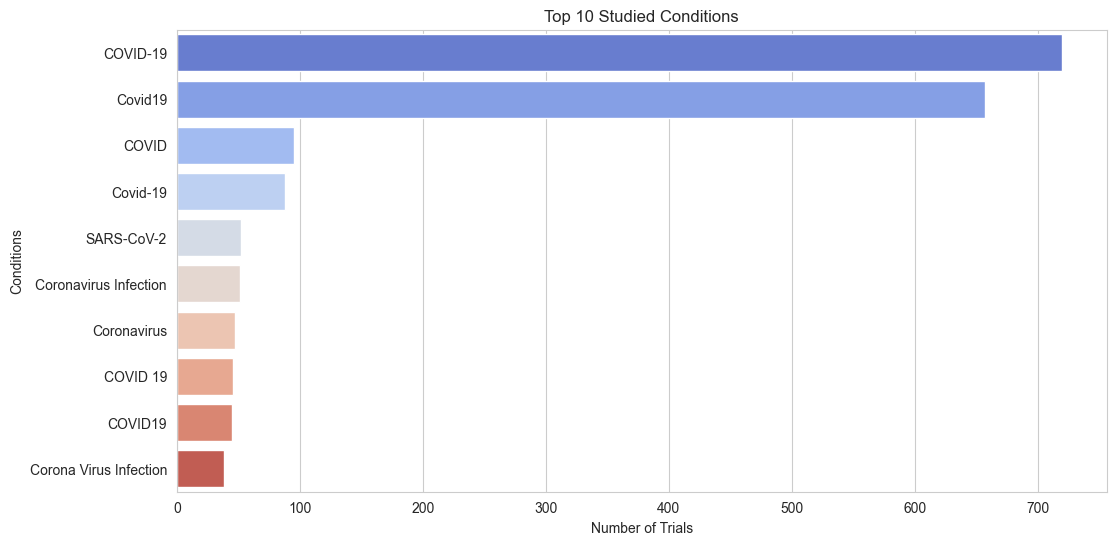

In [16]:
top_conditions = trials_clean['Conditions'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')
plt.title('Top 10 Studied Conditions')
plt.xlabel('Number of Trials')
plt.show()

# Time Series Analysis
## Convert date columns to datetime

In [17]:
date_cols = ['Start Date', 'Completion Date']
for col in date_cols:
    trials_clean[col] = pd.to_datetime(trials_clean[col], errors='coerce')

# Monthly trial starts

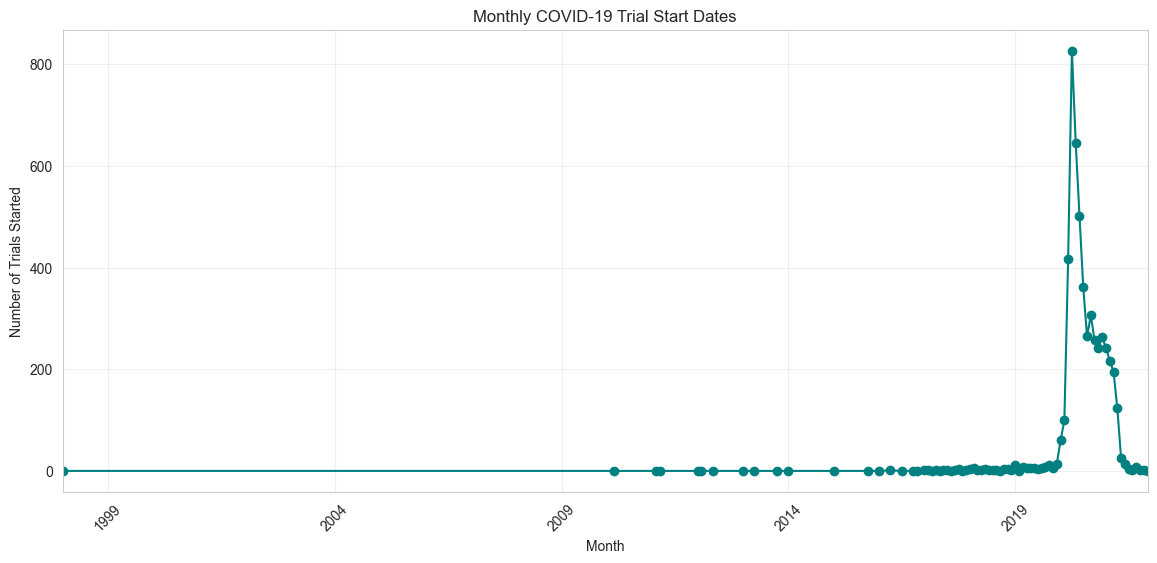

In [18]:
trials_clean['Start Month'] = trials_clean['Start Date'].dt.to_period('M')
monthly_starts = trials_clean['Start Month'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
monthly_starts.plot(kind='line', marker='o', color='teal')
plt.title('Monthly COVID-19 Trial Start Dates')
plt.xlabel('Month')
plt.ylabel('Number of Trials Started')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


# Time to Completion Analysis (for completed trials)

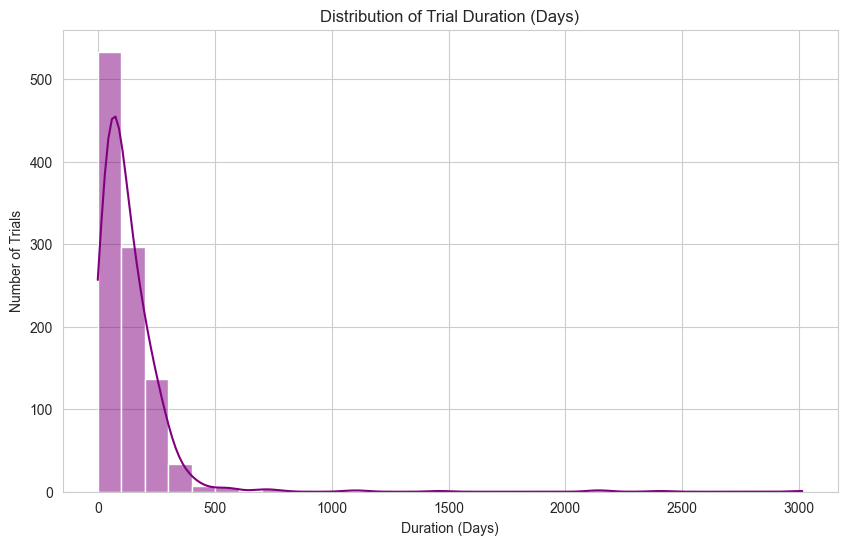

In [19]:
completed = trials_clean[trials_clean['Status'] == 'Completed'].copy()
completed['Duration'] = (completed['Completion Date'] - completed['Start Date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(completed['Duration'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Trial Duration (Days)')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Trials')
plt.show()


# Conclusions and Insights

In [20]:
print("Key Insights:")
print("-" * 50)
print(f"1. Most common status: {status_counts.idxmax()} ({status_counts.max()} trials)")
print(f"2. Dominant phase: {phase_counts.idxmax()} ({phase_counts.max()} trials)")
print(f"3. Top studied condition: {top_conditions.index[0]} ({top_conditions.values[0]} trials)")
print(f"4. Average trial duration: {completed['Duration'].mean():.1f} days")
print(f"5. Peak start month: {monthly_starts.idxmax()} ({monthly_starts.max()} trials started)")
print("-" * 50)

Key Insights:
--------------------------------------------------
1. Most common status: Recruiting (2805 trials)
2. Dominant phase: Not Specified (2461 trials)
3. Top studied condition: COVID-19 (720 trials)
4. Average trial duration: 135.1 days
5. Peak start month: 2020-04 (825 trials started)
--------------------------------------------------


# Save Cleaned Dataset

In [21]:
trials_clean.to_csv('cleaned_covid_clinical_trials.csv', index=False)
print("Cleaned dataset saved as 'cleaned_covid_clinical_trials.csv'")

Cleaned dataset saved as 'cleaned_covid_clinical_trials.csv'
